In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('forest_cover_dataset.csv')
data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [5]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,0.000146,0.380210,0.007469,0.000439,0.037787,0.000000,0.074695,0.032368,0.033979,0.021676,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000732
1,0.000296,0.382769,0.008276,0.000296,0.031331,-0.000887,0.057637,0.032513,0.034730,0.022316,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000739
2,0.000402,0.375821,0.018630,0.001206,0.035920,0.008712,0.426216,0.031363,0.031899,0.018094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000268
3,0.000534,0.371810,0.020693,0.002403,0.032308,0.015754,0.412529,0.031774,0.031774,0.016288,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000267
4,0.000744,0.386275,0.006698,0.000298,0.022775,-0.000149,0.058202,0.032748,0.034832,0.022328,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000744


In [6]:
data_scaled.shape

(15120, 56)

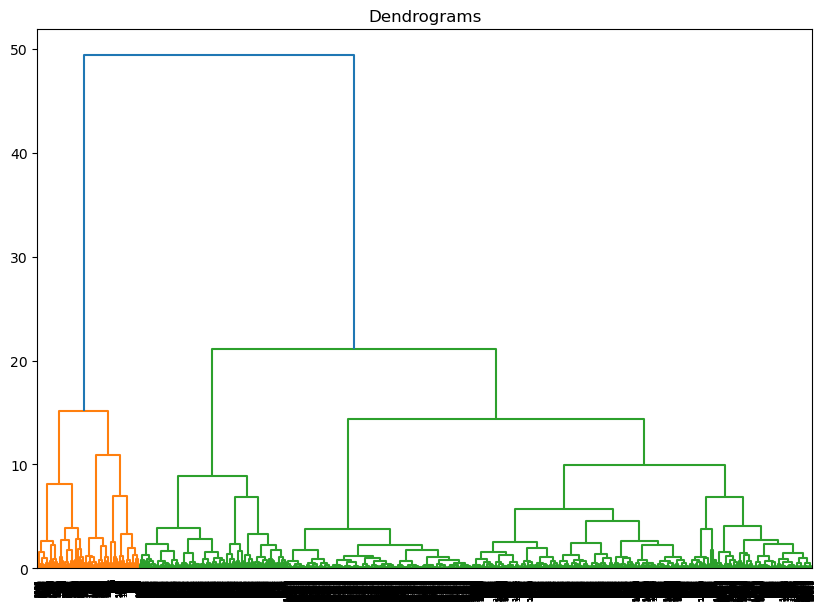

In [7]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

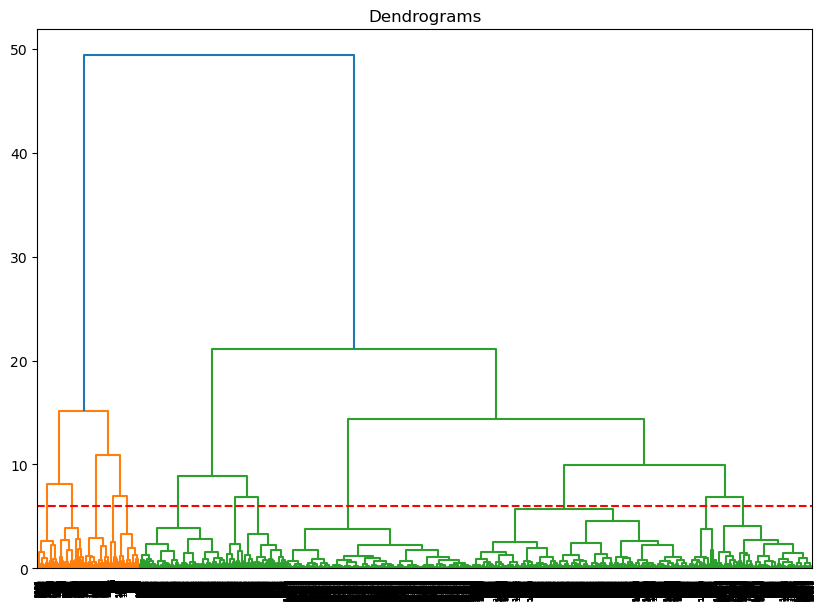

In [8]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [9]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(data_scaled)

/Users/saitarunaditya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, ..., 0, 0, 0])

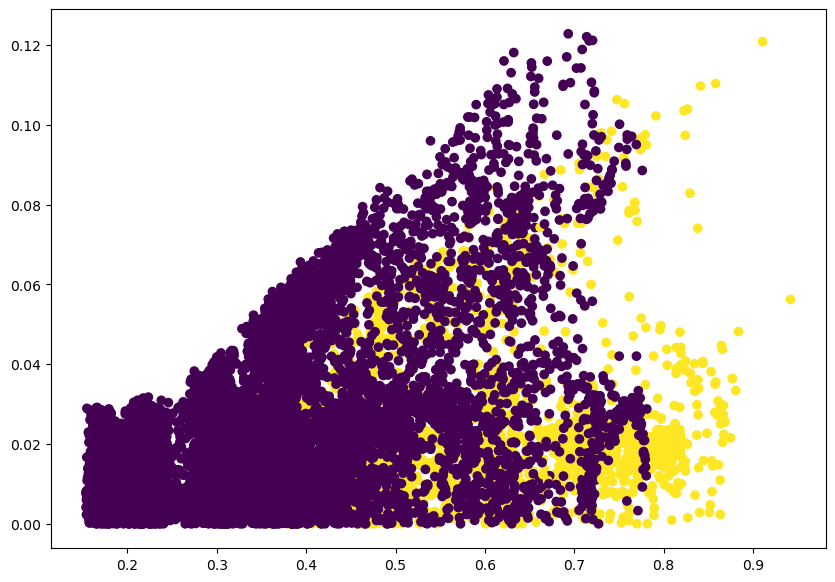

In [10]:
plt.figure(figsize=(10, 7))
plt.scatter(data_scaled['Elevation'], data_scaled['Aspect'], c=cluster.labels_)

/Users/saitarunaditya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


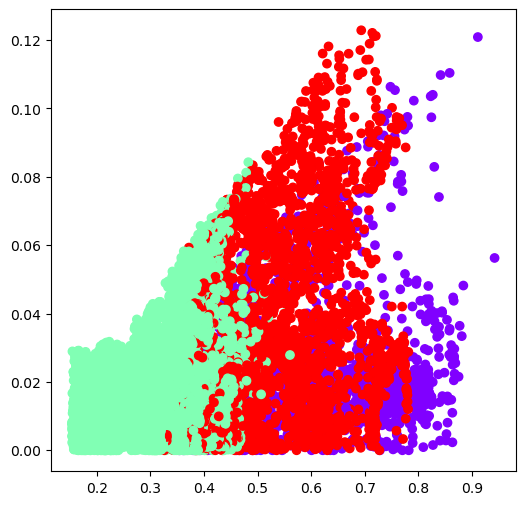

In [11]:
ac3 = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward')

plt.figure(figsize =(6, 6))
plt.scatter(data_scaled['Elevation'], data_scaled['Aspect'],
           c = ac3.fit_predict(data_scaled), cmap ='rainbow')
plt.show()

/Users/saitarunaditya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


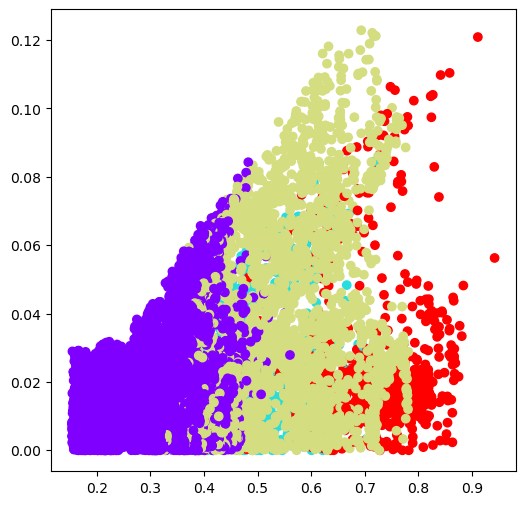

In [12]:
ac2 = AgglomerativeClustering(n_clusters = 4, affinity='euclidean', linkage='ward')

plt.figure(figsize =(6, 6))
plt.scatter(data_scaled['Elevation'], data_scaled['Aspect'], c = ac2.fit_predict(data_scaled), cmap ='rainbow')
plt.show()

In [13]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
silhouette_scores.append(
        silhouette_score(data_scaled, cluster.fit_predict(data_scaled)))
silhouette_scores.append(
        silhouette_score(data_scaled, ac3.fit_predict(data_scaled)))
silhouette_scores.append(
        silhouette_score(data_scaled, ac2.fit_predict(data_scaled)))

/Users/saitarunaditya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/saitarunaditya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/saitarunaditya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


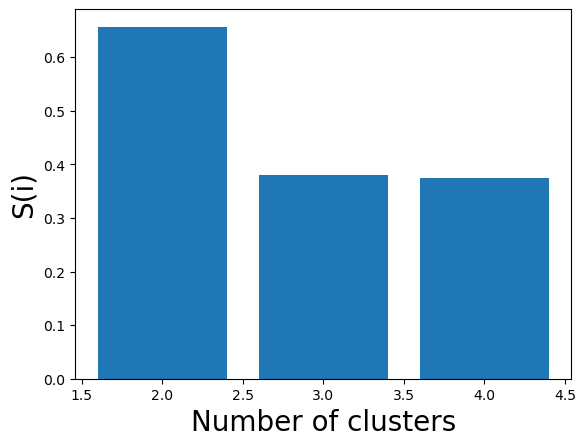

In [14]:
plt.bar([2,3,4], silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()